In [1]:
import pandas as pd

In [11]:
df_all_1 = pd.read_csv('AF_RATIO.txt', sep='\t')
# 将'MEAN_err'列与0.1进行比较
df_all_1['Flag'] = df_all_1['ERROR_all'] > 0.01
# 重新索引数据框
df_all_1 = df_all_1.reset_index(drop=False).rename(columns={'index': 'Position'})

df_all_2 = pd.read_csv('SB_RATIO.txt', sep='\t')
df_all_2['Flag'] = df_all_2['ERROR_all'] > 0
df_all_2 = df_all_2.reset_index(drop=False).rename(columns={'index': 'Position'})


In [ ]:
# 将'MEAN_err'列与0.1进行比较
df_err_v1['Flag'] = df_err_v1['AF'] > 0.01
df_err_v1.head()

# 将'MEAN_err'列与0.1进行比较
df_err_v2['Flag'] = df_err_v2['SB'] > 0
df_err_v2.head()

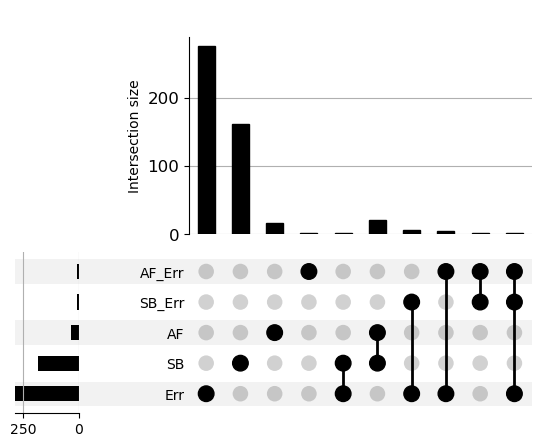

In [64]:
import matplotlib.pyplot as plt
from upsetplot import plot, from_contents

# 您提供的数据集
set1 = set(df_all_1[df_all_1['Flag'] == True]['Position'])
set2 = set(df_all_2[df_all_2['Flag'] == True]['Position'])
set3 = set(df_err[df_err['Flag'] == True]['Position'])
set4 = set(df_err_v1[df_err_v1['Flag'] == True]['Position'])
set5 = set(df_err_v2[df_err_v2['Flag'] == True]['Position'])

# 准备一个字典，其中包含五个集合
sets_dict = {
    "AF": set1,
    "SB": set2,
    "Err": set3,
    "AF_Err": set4,
    "SB_Err": set5
}

# 使用字典生成UpSet图的数据
upset_data = from_contents(sets_dict)

# 自定义颜色
custom_colors = {
    'AF': 'blue',
    'SB': 'orange',
    'Err': 'green',
    'AF_Err': 'red',
    'SB_Err': 'purple'
}

# 绘制UpSet图，添加标题、自定义颜色和调整字体大小
plot(upset_data)
plt.title(" ", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=12)

# 显示图形
plt.show()


In [75]:
df

PassengerId  Survived  Pclass  \
Survived Pclass                                  
False    False             1         0       3   
True     True              2         1       1   
         False             3         1       3   
         True              4         1       1   
False    False             5         0       3   
...                      ...       ...     ...   
         False           887         0       2   
True     True            888         1       1   
False    False           889         0       3   
True     True            890         1       1   
False    False           891         0       3   

                                                              Name     Sex  \
Survived Pclass                                                              
False    False                             Braund, Mr. Owen Harris    male   
True     True    Cumings, Mrs. John Bradley (Florence Briggs Th...  female   
         False                              Heikkinen, Miss. Laina  female   
         True         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   
False    False                            Allen, Mr. William Henry    male   
...                                                            ...     ...   
         False                               Montvila, Rev. Juozas    male   
True     True                         Graham, Miss. Margaret Edith  female   
False    False            Johnston, Miss. Catherine Helen "Carrie"  female   
True     True                                Behr, Mr. Karl Howell    male   
False    False                                 Dooley, Mr. Patrick    male   

                  Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
Survived Pclass                                                                
False    False   22.0      1      0         A/5 21171   7.2500   NaN        S  
True     True    38.0      1      0          PC 17599  71.2833   C85        C  
         False   26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
         True    35.0      1      0            113803  53.1000  C123        S  
False    False   35.0      0      0            373450   8.0500   NaN        S  
...               ...    ...    ...               ...      ...   ...      ...  
         False   27.0      0      0            211536  13.0000   NaN        S  
True     True    19.0      0      0            112053  30.0000   B42        S  
False    False    NaN      1      2        W./C. 6607  23.4500   NaN        S  
True     True    26.0      0      0            111369  30.0000  C148        C  
False    False   32.0      0      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [81]:
df.at[0, 'Sex'] = 'asd'

/tmp/ipykernel_2657398/4084838253.py:1: PerformanceWarning:

indexing past lexsort depth may impact performance.



KeyError: 0

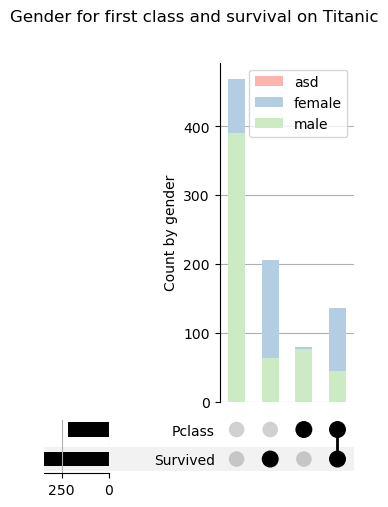

In [84]:
import pandas as pd
from upsetplot import UpSet
from matplotlib import pyplot as plt
from matplotlib import cm

TITANIC_URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'  # noqa
df = pd.read_csv(TITANIC_URL)
df.at[0, 'Sex'] = 'asd'
# Show UpSet on survival and first classs
df = df.set_index(df.Survived == 1).set_index(df.Pclass == 1, append=True)

upset = UpSet(df,
              intersection_plot_elements=0)  # disable the default bar chart
upset.add_stacked_bars(by="Sex", colors=cm.Pastel1,
                       title="Count by gender", elements=10)
upset.plot()
plt.suptitle("Gender for first class and survival on Titanic")
plt.show()

In [21]:
import pandas as pd

# 读取数据
df = pd.read_csv("output.txt", sep='\t')

# 分别计算 DP、AF、SB 的平均值
columns = ["AF", "SB"]
results = {}
for i, col in enumerate(columns):
    df_col = df.dropna(subset=[col])[["Position", col]]
    df_col[col] = df_col[col].astype(float)
    result = df_col.groupby(by=["Position"], as_index=False).max(numeric_only=True)
    result = result[result[col] != 0]  # 只保留非零值
    results[f"df_err_v{i+1}"] = result
    

# 返回结果
df_err_v1 = results["df_err_v1"]
df_err_v2 = results["df_err_v2"]

# 创建一个新的索引
new_index = pd.RangeIndex(start=1, stop=29903, step=1)

# 重新索引数据框
df_err_v1 = df_err_v1.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})
df_err_v2 = df_err_v2.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})


In [22]:
df_err = pd.read_csv("/homes/zihao/EBI_INTER/P1_Coverage/processed_data.txt", sep='\t')[['Position','MEAN_err']]
# 使用loc和布尔索引筛选出满足条件的行，然后删除该列
df = df_err[df_err['Position'].astype(int) <= 29903]

df["MEAN_err"] = pd.to_numeric(df_err['MEAN_err'], errors='coerce')
df_err = df.groupby(by=["Position"], as_index=False).mean(numeric_only=True)

# 重新索引数据框
df_err = df_err.set_index('Position').reindex(new_index, fill_value=0).reset_index(drop=False).rename(columns={'index': 'Position'})

df_err.head()

,Position,MEAN_err
0,1,0.000000
1,2,0.000000
2,3,0.004951
3,4,0.010309
4,5,0.000376


## Tips 
SB>0, and/or a very low coverage (for example a coverage ratio<0.1), and/or an AF>0.01 .

In [23]:
# 将'MEAN_err'列转换为浮点数
df_err['MEAN_err'] = pd.to_numeric(df_err['MEAN_err'], errors='coerce')

# 将NaN值替换为0
df_err['MEAN_err'] = df_err['MEAN_err'].fillna(0)

# 将'MEAN_err'列与0.1进行比较
df_err['Flag'] = df_err['MEAN_err'] > 0.1

df_err.head()

,Position,MEAN_err,Flag
0,1,0.000000,False
1,2,0.000000,False
2,3,0.004951,False
3,4,0.010309,False
4,5,0.000376,False


In [24]:
# 将'MEAN_err'列与0.1进行比较
df_err_v1['Flag'] = df_err_v1['AF'] > 0.01
df_err_v1.head()

# 将'MEAN_err'列与0.1进行比较
df_err_v2['Flag'] = df_err_v2['SB'] > 0
df_err_v2.head()

,Position,SB,Flag
0,1,0.0,False
1,2,0.0,False
2,3,0.0,False
3,4,0.0,False
4,5,0.0,False


In [31]:
SET_SB = set(df_err_v2['Flag'])

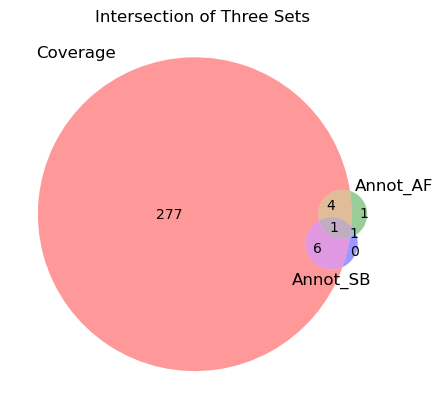

In [29]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# 创建数据
set1 = set(df_err[df_err['Flag'] == True]['Position'])
set2 = set(df_err_v1[df_err_v1['Flag'] == True]['Position'])
set3 = set(df_err_v2[df_err_v2['Flag'] == True]['Position'])

# 创建Venn图
venn3([set1, set2, set3], ('Coverage', 'Annot_AF', 'Annot_SB'))

# 设置图形属性
plt.title('Intersection of Three Sets')
plt.show()


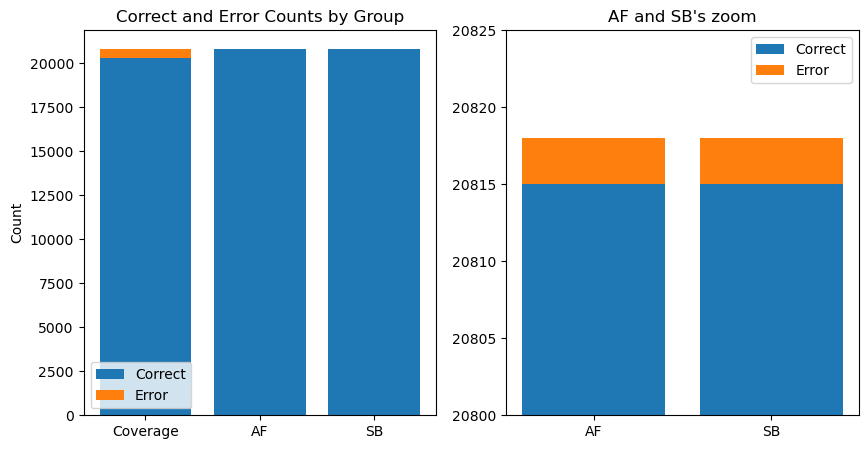

In [100]:
import matplotlib.pyplot as plt

# 创建数据
group_labels = ['Coverage', 'AF', 'SB']
error_counts = [df_err['Flag'].value_counts()[True], df_err_v1['Flag'].value_counts()[True], df_err_v2['Flag'].value_counts()[True]]
correct_counts = [df_err['Flag'].value_counts()[False], df_err_v1['Flag'].value_counts()[False], df_err_v2['Flag'].value_counts()[False]]

# 创建堆积条形图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# 第一个子图
ax1.bar(group_labels, correct_counts, label='Correct')
ax1.bar(group_labels, error_counts, bottom=correct_counts, label='Error')
ax1.set_ylabel('Count')
ax1.set_title('Correct and Error Counts by Group')
ax1.legend()

# 第二个子图
ax2.bar(group_labels[1:], correct_counts[1:], label='Correct')
ax2.bar(group_labels[1:], error_counts[1:], bottom=correct_counts[1:], label='Error')
ax2.set_title('AF and SB\'s zoom')
ax2.set_ylim(20800, 20825)  # 只有第二个子图设置y轴范围
ax2.legend()

# 显示图形
plt.show()

